In [46]:
#importing libraries
import requests
import lxml
import lxml_html_clean
from requests_html import HTMLSession
from bs4 import BeautifulSoup
from pprint import pprint
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Webscraping section

In [4]:
#getting url-setup

#This url didn't work because of the 'show more' button making things difficult
#url = "https://movies.disney.com/a-z"
url = "https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films"
headers = {"User-Agent": "For class web scraping assignment, email: cnelson1845@gmail.com"}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text)
print(r.status_code)

200


In [5]:
#using pandas to get all the tables and then turning the relevant ones into dataframes
tables = pd.read_html(r.text)
#getting the relevant tables of past and current movies (no future)
tables = tables[0:9]
dfs = []
for table in tables:
    dfs.append(table)
print(dfs)

[          Release date                                   Title  \
0    December 21, 1937         Snow White and the Seven Dwarfs   
1     February 7, 1940                               Pinocchio   
2    November 13, 1940                                Fantasia   
3        June 20, 1941                    The Reluctant Dragon   
4     October 23, 1941                                   Dumbo   
5      August 21, 1942                                   Bambi   
6     February 6, 1943                          Saludos Amigos   
7        July 17, 1943               Victory Through Air Power   
8     February 3, 1945                    The Three Caballeros   
9       April 20, 1946                         Make Mine Music   
10   November 12, 1946                       Song of the South   
11  September 27, 1947                      Fun and Fancy Free   
12        May 27, 1948                             Melody Time   
13   November 29, 1948                     So Dear to My Heart   
14     Oc

C:\Users\scott\AppData\Local\Temp\ipykernel_27404\159520408.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


In [6]:
#combining the dataframes
movies = pd.concat(dfs, ignore_index=True)
print(movies.head())

        Release date                            Title  \
0  December 21, 1937  Snow White and the Seven Dwarfs   
1   February 7, 1940                        Pinocchio   
2  November 13, 1940                         Fantasia   
3      June 20, 1941             The Reluctant Dragon   
4   October 23, 1941                            Dumbo   

                                               Notes  
0  first film to be distributed by RKO Radio Pict...  
1   Inducted into the National Film Registry in 1994  
2  anthology film Inducted into the National Film...  
3        fictionalized tour around the Disney studio  
4   Inducted into the National Film Registry in 2017  


In [7]:
#removing the irrelevant column of description
movies = movies.drop('Notes', axis=1)
print(movies.head())

        Release date                            Title
0  December 21, 1937  Snow White and the Seven Dwarfs
1   February 7, 1940                        Pinocchio
2  November 13, 1940                         Fantasia
3      June 20, 1941             The Reluctant Dragon
4   October 23, 1941                            Dumbo


In [8]:
#Getting the title and release year from each column and putting it in a dictionary
the_movies = {}
for idx, movie in movies.iterrows():
    #getting title
    title = movie["Title"]
    #getting year
    year = movie["Release date"][-4:]
    #placing into dictionary
    the_movies[title] = year
pprint(the_movies)

{'101 Dalmatians': '1996',
 "101 Dalmatians II: Patch's London Adventure ‡": '2003',
 '102 Dalmatians': '2000',
 '20,000 Leagues Under the Sea': '1954',
 "A Bug's Life": '1998',
 'A Far Off Place': '1993',
 'A Goofy Movie': '1995',
 "A Kid in King Arthur's Court": '1995',
 'A Tiger Walks': '1964',
 'A Very Merry Pooh Year ‡': '2002',
 'A Wrinkle in Time': '2018',
 'ABCD 2 *': '2015',
 'African Cats': '2011',
 'Air Bud': '1997',
 'Aladdin': '2019',
 'Alexander and the Terrible, Horrible, No Good, Very Bad Day': '2014',
 'Alexander and the Terrible, Horrible, No Good, Very Bad Road Trip ‡': '2025',
 'Alice Through the Looking Glass': '2016',
 'Alice in Wonderland': '2010',
 'Aliens of the Deep': '2005',
 'Almost Angels': '1962',
 "America's Heart and Soul": '2004',
 'Amy': '1981',
 'Angels in the Outfield': '1994',
 'Arjun: The Warrior Prince *': '2012',
 'Around the World in 80 Days': '2004',
 'Artemis Fowl ‡': '2020',
 'Atlantis: The Lost Empire': '2001',
 'Babes in Toyland': '1961',
 

In [9]:
#getting Rotten Tomatoes urls for all the titles
#Note: Rotten Tomatoes does the title all lowercase with no special characters, and all spaces replaced by underscores
#Ex- Terminator: Dark Fate
#url is- https://www.rottentomatoes.com/m/terminator_dark_fate
#format: https://www.rottentomatoes.com/m/{title}
#Notes: If there are multiple version they either have the year after the movie title:
#Ex: https://www.rottentomatoes.com/m/the_little_mermaid_1989
#or they add a little internal number before the title 
#Ex: https://www.rottentomatoes.com/m/1074108-101_dalmatians
#The last one is worst case scenario and we look for it last, for all of these urls we will need to check if we get a proper request back

urls = []
clean_dict = {}
base = "https://www.rottentomatoes.com/m/"
for title in the_movies:
    #formatting title for rotten tomatoes
    clean = title
    if "[N 1]" in clean:
        clean = clean.replace("[N 1]","")
    #all lowercase
    clean = clean.lower()
    #removing special characters
    clean = clean.replace(":","").replace("!","").replace("/","").replace("'","").replace(",","").replace(".","")
    clean = clean.replace(" ‡","").replace(" †","").replace(" §","").replace(" *","").replace("½","_12")
    #replacing some other special characters
    clean = clean.replace("&","and").replace("í","i")
    #replacing spaces with underscores
    clean = clean.replace(" ","_").replace("-","_")
    #adding it to another dictionary to keep track of years
    clean_dict[clean] = the_movies[title]
    #creating full url with it (make sure year is still there)
    full_url = f"{base}{clean}"
    urls.append(full_url)
print(len(urls))
pprint(urls)

525
['https://www.rottentomatoes.com/m/snow_white_and_the_seven_dwarfs',
 'https://www.rottentomatoes.com/m/pinocchio',
 'https://www.rottentomatoes.com/m/fantasia',
 'https://www.rottentomatoes.com/m/the_reluctant_dragon',
 'https://www.rottentomatoes.com/m/dumbo',
 'https://www.rottentomatoes.com/m/bambi',
 'https://www.rottentomatoes.com/m/saludos_amigos',
 'https://www.rottentomatoes.com/m/victory_through_air_power',
 'https://www.rottentomatoes.com/m/the_three_caballeros',
 'https://www.rottentomatoes.com/m/make_mine_music',
 'https://www.rottentomatoes.com/m/song_of_the_south',
 'https://www.rottentomatoes.com/m/fun_and_fancy_free',
 'https://www.rottentomatoes.com/m/melody_time',
 'https://www.rottentomatoes.com/m/so_dear_to_my_heart',
 'https://www.rottentomatoes.com/m/the_adventures_of_ichabod_and_mr_toad',
 'https://www.rottentomatoes.com/m/cinderella',
 'https://www.rottentomatoes.com/m/treasure_island',
 'https://www.rottentomatoes.com/m/alice_in_wonderland',
 'https://www.

In [10]:
#Note: This box takes awhile, I'm talking about 10-15 minutes

#making a dictionary to mark the bad ones
marked = {}
#checking all the urls, if they fail, we add the year
for i, url in enumerate(urls):
    #create a request object and check if the status code is 200 or not
    r = requests.get(url)
    if not r.status_code == 200:
        #trying to fix it by removing 'the'
        current = url.replace("the_","",1)
        s = requests.get(current)
        if s.status_code == 200:
            urls[i] = current
            continue
        #trying to fix by removing a
        current = url.replace("a_","",1)
        s = requests.get(current)
        if s.status_code == 200:
            urls[i] = current
            continue
        #we try fixing it by adding the year
        title = url.rsplit("/",1)[1]
        current = url+f"_{clean_dict[title]}"
        s = requests.get(current)
        if s.status_code == 200:
            urls[i] = current
            continue
        #we try and fix it by changing roman numeral ii to number 2
        current = url.replace("ii","2")
        s = requests.get(current)
        if s.status_code == 200:
            urls[i] = current
            continue
        #adding to marked since it couldn't be easily fixed
        marked[i] = url
#pretty printing it so I can read it
pprint(marked)

{7: 'https://www.rottentomatoes.com/m/victory_through_air_power',
 18: 'https://www.rottentomatoes.com/m/the_story_of_robin_hood',
 24: 'https://www.rottentomatoes.com/m/20000_leagues_under_the_sea',
 36: 'https://www.rottentomatoes.com/m/the_light_in_the_forest',
 37: 'https://www.rottentomatoes.com/m/white_wilderness',
 43: 'https://www.rottentomatoes.com/m/toby_tyler_or_10_weeks_with_a_circus',
 44: 'https://www.rottentomatoes.com/m/kidnapped',
 51: 'https://www.rottentomatoes.com/m/the_absent_minded_professor',
 58: 'https://www.rottentomatoes.com/m/big_red',
 71: 'https://www.rottentomatoes.com/m/the_moon_spinners',
 83: 'https://www.rottentomatoes.com/m/the_gnome_mobile',
 192: 'https://www.rottentomatoes.com/m/angels_in_the_outfield',
 195: 'https://www.rottentomatoes.com/m/rudyard_kiplings_the_jungle_book',
 218: 'https://www.rottentomatoes.com/m/george_of_the_jungle',
 227: 'https://www.rottentomatoes.com/m/serengeti_symphony',
 230: 'https://www.rottentomatoes.com/m/mighty_jo

In [13]:
#manually fixing the bad urls
urls[7] = "https://www.rottentomatoes.com/m/victory-through-air-power"
urls[18] = "https://www.rottentomatoes.com/m/story_of_robin_hood_and_his_merrie_men"
urls[24] = "https://www.rottentomatoes.com/m/1000079-20000_leagues_under_the_sea"
urls[36] = "https://www.rottentomatoes.com/m/1012343-light_in_the_forest"
urls[37] = "https://www.rottentomatoes.com/m/truelife_adventures_white_wilderness"
urls[43] = "https://www.rottentomatoes.com/m/toby_tyler"
urls[44] = "https://www.rottentomatoes.com/m/1011511-kidnapped"
urls[51] = "https://www.rottentomatoes.com/m/absentminded_professor"
urls[58] = "https://www.rottentomatoes.com/m/1002343-big_red"
urls[71] = "https://www.rottentomatoes.com/m/moonspinners"
urls[83] = "https://www.rottentomatoes.com/m/gnomemobile"
urls[192] = "https://www.rottentomatoes.com/m/1055833-angels_in_the_outfield"
urls[195] = "https://www.rottentomatoes.com/m/1057637-jungle_book"
urls[218] = "https://www.rottentomatoes.com/m/1077847-george_of_the_jungle"
urls[227] = "" #There is no entry in rotten tomatoes for Serengeti Symphony, will delete at end
urls[230] = "https://www.rottentomatoes.com/m/1084582-mighty_joe_young"
#urls[262] = "https://www.rottentomatoes.com/m/spirited_away" #different
urls[265] = "https://www.rottentomatoes.com/m/winnie-the-pooh-a-very-merry-pooh-year"
urls[285] = "https://www.rottentomatoes.com/m/winnie_the_pooh_springtime_with_roo"
urls[287] = "https://www.rottentomatoes.com/m/1141548-sacred_planet"
urls[291] = "https://www.rottentomatoes.com/m/the-three-musketeers2004"
#urls[302] = "https://www.rottentomatoes.com/m/howls_moving_castle" #different
urls[305] = "https://www.rottentomatoes.com/m/lilo_and_stitch_2"
urls[309] = "https://www.rottentomatoes.com/m/chronicles_of_narnia_lion_witch_wardrobe"
urls[311] = "https://www.rottentomatoes.com/m/1155467-glory_road"
urls[321] = "https://www.rottentomatoes.com/m/the_nightmare_before_christmas"
urls[322] = "https://www.rottentomatoes.com/m/santa_clause_3"
urls[332] = "https://www.rottentomatoes.com/m/the_gameplan"
urls[342] = "https://www.rottentomatoes.com/m/10008587-beverly_hills_chihuahua"
urls[344] = "https://www.rottentomatoes.com/m/1194524-high_school_musical_3_senior_year"
urls[350] = "https://www.rottentomatoes.com/m/jonas_brothers_3d"
urls[354] = "https://www.rottentomatoes.com/m/trail-of-the-panda"
urls[357] = "https://www.rottentomatoes.com/m/hexe_lilli_der_drache_und_das_magische_buch"
urls[358] = "https://www.rottentomatoes.com/m/10009462-g_force"
#urls[360] = "https://www.rottentomatoes.com/m/walt_and_el_grupo" #different
urls[361] = "" #there is no entry for SpangaS op Survival, thus it will be deleted at the end
urls[364] = "https://www.rottentomatoes.com/m/10008502-christmas_carol"
urls[366] = "https://www.rottentomatoes.com/m/10009596-old_dogs"
urls[368] = "https://www.rottentomatoes.com/m/high_school_musical_el_desafio"
urls[374] = "https://www.rottentomatoes.com/m/gedo-senki-tales-from-earthsea"
urls[382] = "https://www.rottentomatoes.com/m/10011582-tron_legacy"
urls[433] = "https://www.rottentomatoes.com/m/tini_el_gran_cambio_de_violetta"
urls[441] = "https://www.rottentomatoes.com/m/march_of_the_penguins_2_the_next_step"
urls[449] = "https://www.rottentomatoes.com/m/disneynature_expedition_china"
urls[485] = "https://www.rottentomatoes.com/m/the_last_warrior_2017"
urls[487] = "https://www.rottentomatoes.com/m/the_beatles_get_back_the_rooftop_concert"
#Note: The null entries were Dutch in origin

#deleted null entries
urls.pop(361)
urls.pop(227)

''

In [14]:
#Note: This is going to take a long time again, 8-10 minutes

#getting relevant information from each url
title = []
audience_score = []
critic_score = []
revenue = []
genre = []
runtime = []
director = []
year = []
#This is film rating-PG,R,etc
rating = []
#We will get the full date now, but we will likely need to split it into month and year (and season) later
release_date = []
for url in urls:
    r = requests.get(url)
    print(url)
    if r.status_code != 200:
        raise KeyError
    soup = BeautifulSoup(r.text)

    #getting title
    titl = soup.find("rt-text", slot="title",context="heading")
    title.append(titl.text)
    #getting audience score
    audScore = soup.find("rt-text", slot="audienceScore")
    audience_score.append(audScore.text)
    #getting critic score
    criticScore = soup.find("rt-text", slot="criticsScore")
    critic_score.append(criticScore.text)

    #getting film rating, release decade, and runtime
    texts = soup.find_all("rt-text",attrs={"slot": "metadataProp", "context": "label", "size": "0.875"})
    
    #accounting for movies that don't have a rating in the title
    if len(texts)==1:
        rating.append(None)
        #getting release decade
        year.append(texts[0].text)
        #getting runtime
        runtime.append(None)
    elif len(texts)==2:
        if texts[0] == "TV-G": #Handling the weird Mickey Movie that only has rating and runtime, not year
            rating.append(texts[0])
            #getting release decade
            year.append(None)
            #getting runtime
            runtime.append(texts[1].text)
        else:
            rating.append(None)
            #getting release decade
            year.append(texts[0].text)
            #getting runtime
            runtime.append(texts[1].text)
    else: #len(texts)==3
        rating.append(texts[0].text)
        #getting release decade
        year.append(texts[1].text)
        #getting runtime
        runtime.append(texts[2].text)

    #getting genre(s)
    texts = soup.find_all("rt-text",attrs={"slot": "metadataGenre","size": "0.875"})
    gs = []
    for text in texts:
        gs.append(text.text)
    genre.append(gs)

    #getting release date
    texts = soup.find_all("div",class_="category-wrap",attrs={"data-qa": "item"})
    has_date = False
    has_revenue = False
    has_director = False
    for text in texts:
        current = text.find("dt",class_="key").text
        if current.strip() == "Release Date (Theaters)":
            has_date=True
            temp = text.find("dd",attrs={"data-qa":"item-value-group"}) 
            release_date.append(temp.find("rt-text").text)
    #getting box-office revenue (might not exist)
        if current.strip() == "Box Office (Gross USA)":
            has_revenue = True
            temp = text.find("dd",attrs={"data-qa":"item-value-group"}) 
            revenue.append(temp.find("rt-text").text)
    #getting director
        if current.strip() == "Director":
            has_director = True
            temp = text.find("dd",attrs={"data-qa":"item-value-group"}) 
            director.append(temp.find("rt-link").text)
    if not has_date:
        release_date.append(None)
    if not has_revenue:
            revenue.append(None)
    if not has_director:
            director.append(None)


https://www.rottentomatoes.com/m/snow_white_and_the_seven_dwarfs
https://www.rottentomatoes.com/m/pinocchio
https://www.rottentomatoes.com/m/fantasia
https://www.rottentomatoes.com/m/the_reluctant_dragon
https://www.rottentomatoes.com/m/dumbo
https://www.rottentomatoes.com/m/bambi
https://www.rottentomatoes.com/m/saludos_amigos
https://www.rottentomatoes.com/m/victory-through-air-power
https://www.rottentomatoes.com/m/the_three_caballeros
https://www.rottentomatoes.com/m/make_mine_music
https://www.rottentomatoes.com/m/song_of_the_south
https://www.rottentomatoes.com/m/fun_and_fancy_free
https://www.rottentomatoes.com/m/melody_time
https://www.rottentomatoes.com/m/so_dear_to_my_heart
https://www.rottentomatoes.com/m/adventures_of_ichabod_and_mr_toad
https://www.rottentomatoes.com/m/cinderella
https://www.rottentomatoes.com/m/treasure_island
https://www.rottentomatoes.com/m/alice_in_wonderland
https://www.rottentomatoes.com/m/story_of_robin_hood_and_his_merrie_men
https://www.rottentoma

In [15]:
#putting the information into a dataframe
df = pd.DataFrame({"Title":title,"Audience-Score":audience_score,"Critic-Score":critic_score,"Revenue":revenue,"Release-Date":release_date,"Year":year, "Film-Rating":rating,"Director":director,"Genre":genre,"Runtime":runtime})
#printing to check what we will need to clean next
print(df.head())

                             Title Audience-Score Critic-Score Revenue  \
0  Snow White and the Seven Dwarfs            78%          97%    None   
1                        Pinocchio            33%           0%   $3.7M   
2                         Fantasia            83%          95%  $24.8M   
3             The Reluctant Dragon            66%         100%    None   
4                            Dumbo            70%          95%    None   

             Release-Date  Year Film-Rating          Director  \
0                    None  1937           G        David Hand   
1      Dec 25, 2002, Wide  2002           G   Roberto Benigni   
2   Nov 13, 1940, Limited  1940           G       James Algar   
3    Jan 2, 1941, Limited  1941        None  Alfred L. Werker   
4  Oct 23, 1941, Original  1941           G    Ben Sharpsteen   

                                     Genre Runtime  
0      [Kids & Family, Fantasy, Animation]  1h 20m  
1  [Kids & Family, Fantasy, Comedy, Drama]  1h 47m  
2    

In [16]:
#cleaning the dataframe
#changing all None values to np.nan
df = df.applymap(lambda x: np.nan if x is None else x)
df = df.applymap(lambda x: np.nan if x == '' else x) 
#removing % from audience and critic score
df["Audience-Score"] = df["Audience-Score"].replace("%","", regex=True)
df["Critic-Score"] = df["Critic-Score"].replace("%","", regex=True)
df["Audience-Score"] = df["Audience-Score"].astype("Int64")
df['Critic-Score'] = df['Critic-Score'].astype("Int64")
#Turning revenue into a integer and removing words and symbols
df["Revenue"] = df["Revenue"].replace("\$", "", regex=True)

def convert_revenue(x):
    if isinstance(x, str):
        if "M" in x:
            temp = float(x.replace("M", "")) * 1000000
            return temp
        elif "K" in x:
            return float(x.replace("K", "")) * 1000
        else:
            raise ValueError
    else:
        return np.nan

df["Revenue"] = df["Revenue"].apply(convert_revenue)
print(df.head())

                             Title  Audience-Score  Critic-Score     Revenue  \
0  Snow White and the Seven Dwarfs              78            97         NaN   
1                        Pinocchio              33             0   3700000.0   
2                         Fantasia              83            95  24800000.0   
3             The Reluctant Dragon              66           100         NaN   
4                            Dumbo              70            95         NaN   

             Release-Date  Year Film-Rating          Director  \
0                     NaN  1937           G        David Hand   
1      Dec 25, 2002, Wide  2002           G   Roberto Benigni   
2   Nov 13, 1940, Limited  1940           G       James Algar   
3    Jan 2, 1941, Limited  1941         NaN  Alfred L. Werker   
4  Oct 23, 1941, Original  1941           G    Ben Sharpsteen   

                                     Genre Runtime  
0      [Kids & Family, Fantasy, Animation]  1h 20m  
1  [Kids & Family, Fan

<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
C:\Users\scott\AppData\Local\Temp\ipykernel_27404\2366948810.py:11: SyntaxWarning: invalid escape sequence '\$'
  df["Revenue"] = df["Revenue"].replace("\$", "", regex=True)
C:\Users\scott\AppData\Local\Temp\ipykernel_27404\2366948810.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if x is None else x)
C:\Users\scott\AppData\Local\Temp\ipykernel_27404\2366948810.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if x == '' else x)


In [17]:
#cleaning up the Year and ensuring it is an int
df["Year"] = df["Year"].apply(lambda x: "2025" if x == "Now Playing" else x)
df["Year"] = df.apply(lambda row: (re.sub(r"^[A-Za-z]{3}\s","",row.Year)), axis=1)
#Dealing with weird Mickey Movie case:
df.loc[df["Year"] == 'TV-G', "Film-Rating"] = 'TV-G'
df.loc[df["Year"] == 'TV-G', "Year"] = np.nan
#Making rest into ints
df['Year'] = df['Year'].astype("Int64")
#Note: The box office revenue is not adjusted for inflation, this will need to be accounted for
print(df.head())

                             Title  Audience-Score  Critic-Score     Revenue  \
0  Snow White and the Seven Dwarfs              78            97         NaN   
1                        Pinocchio              33             0   3700000.0   
2                         Fantasia              83            95  24800000.0   
3             The Reluctant Dragon              66           100         NaN   
4                            Dumbo              70            95         NaN   

             Release-Date  Year Film-Rating          Director  \
0                     NaN  1937           G        David Hand   
1      Dec 25, 2002, Wide  2002           G   Roberto Benigni   
2   Nov 13, 1940, Limited  1940           G       James Algar   
3    Jan 2, 1941, Limited  1941         NaN  Alfred L. Werker   
4  Oct 23, 1941, Original  1941           G    Ben Sharpsteen   

                                     Genre Runtime  
0      [Kids & Family, Fantasy, Animation]  1h 20m  
1  [Kids & Family, Fan

In [18]:
#changing runtime into only minutes and making it an int
def runtime_to_minutes(x):
    # handle NaN or missing strings
    if not isinstance(x, str) or x.strip() == "":
        return np.nan  
    # Extract hours and minutes 
    hour = re.search(r"(\d+)h", x)
    minute = re.search(r"(\d+)m", x)
    hours = int(hour.group(1)) if hour else 0
    minutes = int(minute.group(1)) if minute else 0
    return hours * 60 + minutes

df["Runtime"] = df["Runtime"].apply(runtime_to_minutes)

#Cleaning release date
#Removing the word from the release date
df["Release-Date"] = df["Release-Date"].apply(lambda x: re.sub(r",\s[A-Za-z]+$", "", x) if isinstance(x, str) else x)
#Changing it into a datetime object
df["Release-Date"] = pd.to_datetime(df["Release-Date"], errors="coerce")
print(df.head())

                             Title  Audience-Score  Critic-Score     Revenue  \
0  Snow White and the Seven Dwarfs              78            97         NaN   
1                        Pinocchio              33             0   3700000.0   
2                         Fantasia              83            95  24800000.0   
3             The Reluctant Dragon              66           100         NaN   
4                            Dumbo              70            95         NaN   

  Release-Date  Year Film-Rating          Director  \
0          NaT  1937           G        David Hand   
1   2002-12-25  2002           G   Roberto Benigni   
2   1940-11-13  1940           G       James Algar   
3   1941-01-02  1941         NaN  Alfred L. Werker   
4   1941-10-23  1941           G    Ben Sharpsteen   

                                     Genre  Runtime  
0      [Kids & Family, Fantasy, Animation]     80.0  
1  [Kids & Family, Fantasy, Comedy, Drama]    107.0  
2      [Kids & Family, Fantasy, 

In [19]:
#confirming everything is clean by getting unique counts
print("Column: Film-Rating")
print(df["Film-Rating"].unique())
print("-" * 40)
print("Column: Revenue")
print(df["Revenue"].unique())
print("-" * 40)
print("Column: Runtime")
print(df["Runtime"].unique())
print("-" * 40)
print("Column: Year")
print(df["Year"].unique())
print("-" * 40)
print("Column: Audience Score")
print(df["Audience-Score"].unique())
print("-" * 40)
print("Column: Critic Score")
print(df["Critic-Score"].unique())
print("-" * 40)

Column: Film-Rating
['G' nan 'PG' 'TV-G' 'TV-PG' 'PG-13' 'R' 'TV-14']
----------------------------------------
Column: Revenue
[      nan 3.700e+06 2.480e+07 3.810e+07 3.350e+07 9.130e+07 6.630e+07
 1.830e+07 1.102e+08 8.500e+06 1.240e+07 3.730e+07 1.720e+07 2.200e+07
 1.370e+07 1.302e+08 7.900e+06 1.810e+07 1.490e+07 7.300e+06 1.382e+05
 2.700e+06 5.870e+07 5.070e+07 3.556e+08 2.740e+07 4.160e+07 1.290e+07
 2.380e+07 1.700e+06 2.060e+07 3.060e+07 4.560e+07 8.700e+06 9.560e+07
 5.020e+07 3.300e+06 1.455e+08 4.320e+07 1.770e+07 1.910e+07 8.200e+06
 3.530e+07 1.416e+08 2.470e+07 1.340e+07 3.180e+04 6.700e+06 2.390e+07
 3.430e+07 3.280e+07 2.890e+07 1.001e+08 2.650e+07 2.300e+07 5.990e+07
 9.910e+07 1.053e+08 2.460e+07 9.300e+07 2.140e+07 4.400e+06 1.206e+08
 1.628e+08 5.060e+07 3.680e+07 1.940e+07 9.740e+07 6.200e+06 2.459e+08
 6.050e+07 6.970e+07 1.158e+08 6.690e+07 8.960e+07 3.670e+07 1.082e+08
 1.730e+07 4.940e+05 8.120e+07 4.840e+07 1.700e+07 1.000e+07 1.920e+07
 1.392e+08 6.730e+07 

In [20]:
#making sure everything is its proper type (str or int or such)
print(df.dtypes)
print("_______________________________")
#Fixing those that are incorrect
df["Title"].astype(str)
df["Film-Rating"].astype(str)
df["Director"].astype(str)
df["Runtime"] = df["Runtime"].round(0).astype("Int64")
df["Revenue"] = df["Revenue"].round(0).astype("Int64")
#checking again
print(df.dtypes)

Title                     object
Audience-Score             Int64
Critic-Score               Int64
Revenue                  float64
Release-Date      datetime64[ns]
Year                       Int64
Film-Rating               object
Director                  object
Genre                     object
Runtime                  float64
dtype: object
_______________________________
Title                     object
Audience-Score             Int64
Critic-Score               Int64
Revenue                    Int64
Release-Date      datetime64[ns]
Year                       Int64
Film-Rating               object
Director                  object
Genre                     object
Runtime                    Int64
dtype: object


In [ ]:
#creating month, year, decade, and season column from "Release-Date" and deleting release date column
df["month"] = (df["Release-Date"]).dt.month
df["Year"] = (df["Release-Date"]).dt.year

#decade creation    
df["Decade"] = (df["Year"] // 10) * 10
#sseson creation
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else: 
        return np.nan

df["season"] = df["month"].apply(get_season)


df.head()

,Title,Audience-Score,Critic-Score,Revenue,Release-Date,Year,Film-Rating,Director,Genre,Runtime,month,season,Decade
0,Snow White and the Seven Dwarfs,78,97,<NA>,NaT,NaN,G,David Hand,"[Kids & Family, Fantasy, Animation]",80,NaN,NaN,NaN
1,Pinocchio,33,0,3700000,2002-12-25,2002.0,G,Roberto Benigni,"[Kids & Family, Fantasy, Comedy, Drama]",107,12.0,Winter,2000.0
2,Fantasia,83,95,24800000,1940-11-13,1940.0,G,James Algar,"[Kids & Family, Fantasy, Animation]",120,11.0,Fall,1940.0
3,The Reluctant Dragon,66,100,<NA>,1941-01-02,1941.0,NaN,Alfred L. Werker,"[Kids & Family, Fantasy]",72,1.0,Winter,1940.0
4,Dumbo,70,95,<NA>,1941-10-23,1941.0,G,Ben Sharpsteen,"[Kids & Family, Fantasy, Animation]",64,10.0,Fall,1940.0


In [33]:
#saving the dataframe as a csv

df.to_csv("Film_data.csv", index=False)

In [ ]:
#Analysis Section - From here on, rating refers to score unless otherwise specified

In [40]:
#What is the average movie rating (audeance)
df["Audience-Score"].mean()

np.float64(61.17400419287212)

In [ ]:
#what is the avrage revanue per movie
df['Revenue'].mean()

np.float64(83668368.77828054)

In [41]:
#What is the average movie rating (critict)
df["Critic-Score"].mean()

np.float64(62.64902506963789)

In [126]:
# corralation between score types
correlation_aud_crit = df['Audience-Score'].corr(df['Critic-Score'])
print(correlation_aud_crit)

0.7203888097676349


In [ ]:
#What is the average movie rating each year? (audience and critic)

Aud_mean_year = df.groupby('Year')['Audience-Score'].mean()
Crit_mean_year = df.groupby('Year')['Critic-Score'].mean()
Ave_mean_year = (Aud_mean_year + Crit_mean_year)/2

print(f"Year and Avrage Audience score: {Aud_mean_year}")
print(f"year and Avrage Critic score: {Crit_mean_year}")
print(f"The average of the two scores by year: {Ave_mean_year}")

# some relase dates are missing so not all movies are inclueded, movies with out a relese dates are exclueded. movies with out ratings are also excuded


Year and Avrage Audience score: Year
1926.0         57.0
1940.0         91.5
1941.0         68.0
1942.0         73.0
1943.0         40.0
            ...    
2021.0        94.75
2022.0    81.333333
2023.0         84.0
2024.0    85.428571
2025.0         91.0
Name: Audience-Score, Length: 82, dtype: Float64
year and Avrage Critic score: Year
1926.0    87.0
1940.0    95.0
1941.0    97.5
1942.0    91.0
1943.0    82.0
          ... 
2021.0    80.5
2022.0    82.0
2023.0    85.5
2024.0    82.0
2025.0    77.0
Name: Critic-Score, Length: 82, dtype: Float64
The average of the two scores by year: Year
1926.0         72.0
1940.0        93.25
1941.0        82.75
1942.0         82.0
1943.0         61.0
            ...    
2021.0       87.625
2022.0    81.666667
2023.0        84.75
2024.0    83.714286
2025.0         84.0
Length: 82, dtype: Float64


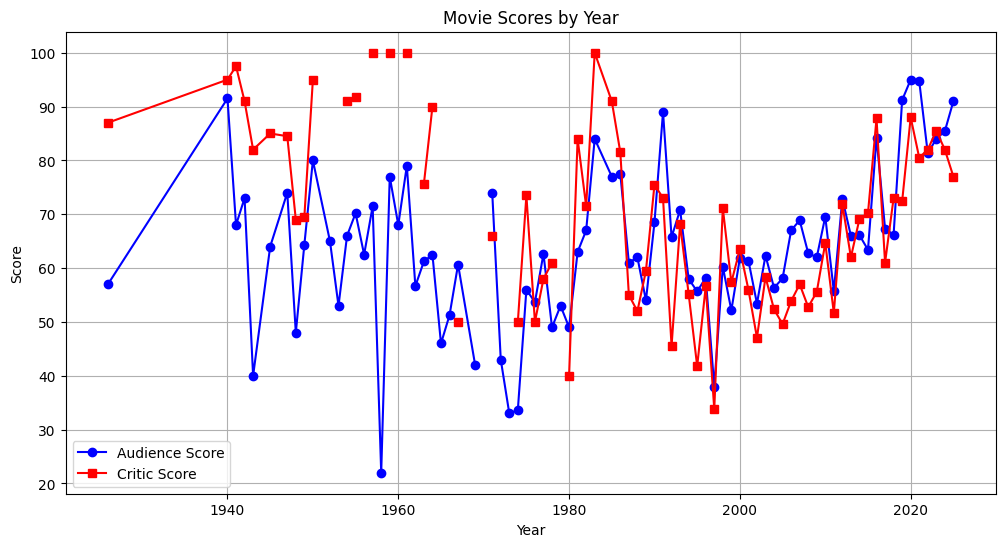

In [ ]:
#plot year and critics/ audeance score
plt.figure(figsize=(12,6))

# Scatter or line plots
plt.plot(Aud_mean_year.index, Aud_mean_year.values, marker='o', label='Audience Score', color='blue')
plt.plot(Crit_mean_year.index, Crit_mean_year.values, marker='s', label='Critic Score', color='red')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Score")
plt.title("Movie Scores by Year")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
#Average movie rating each decade (audience and critic)

Aud_mean_dec = df.groupby('Decade')['Audience-Score'].mean()
Crit_mean_dec = df.groupby('Decade')['Critic-Score'].mean()
ave_mean_dec = ((Aud_mean_dec+Crit_mean_dec)/2).mean()

print(f"Decade and Avrage Audience score: {Aud_mean_year}")
print(f"Decade and Avrage Critic score: {Crit_mean_year}")
print(f"The average of the two scores by Decade: {Ave_mean_year}")

Decade and Avrage Audience score: Year
1926.0         57.0
1940.0         91.5
1941.0         68.0
1942.0         73.0
1943.0         40.0
            ...    
2021.0        94.75
2022.0    81.333333
2023.0         84.0
2024.0    85.428571
2025.0         91.0
Name: Audience-Score, Length: 82, dtype: Float64
Decade and Avrage Critic score: Year
1926.0    87.0
1940.0    95.0
1941.0    97.5
1942.0    91.0
1943.0    82.0
          ... 
2021.0    80.5
2022.0    82.0
2023.0    85.5
2024.0    82.0
2025.0    77.0
Name: Critic-Score, Length: 82, dtype: Float64
The average of the two scores by Decade: Year
1926.0         72.0
1940.0        93.25
1941.0        82.75
1942.0         82.0
1943.0         61.0
            ...    
2021.0       87.625
2022.0    81.666667
2023.0        84.75
2024.0    83.714286
2025.0         84.0
Length: 82, dtype: Float64


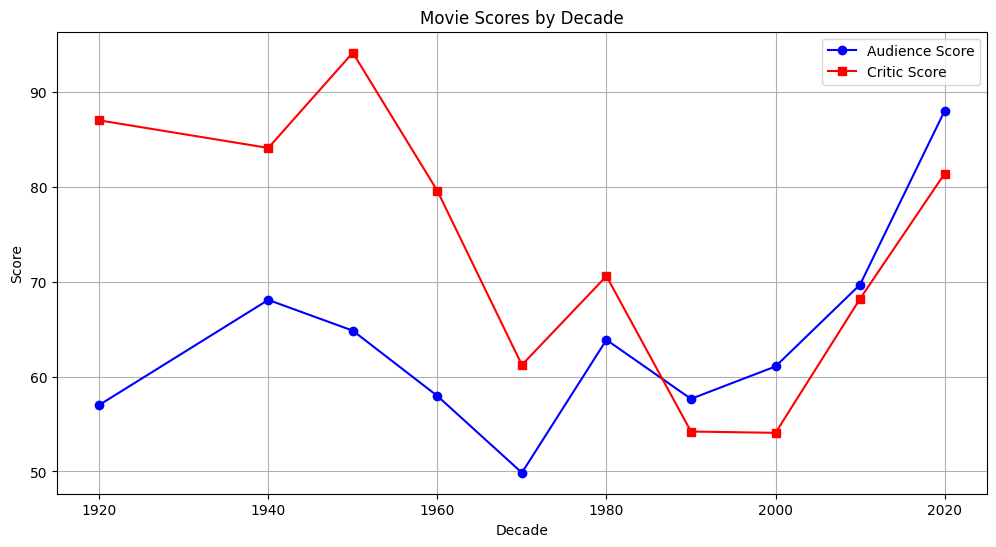

In [64]:
# decade plot

plt.figure(figsize=(12,6))

# Scatter or line plots
plt.plot(Aud_mean_dec.index, Aud_mean_dec.values, marker='o', label='Audience Score', color='blue')
plt.plot(Crit_mean_dec.index, Crit_mean_dec.values, marker='s', label='Critic Score', color='red')

# Labels and title
plt.xlabel("Decade")
plt.ylabel("Score")
plt.title("Movie Scores by Decade")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Note section:
#What is the trend in ratings? (rising, falling, stagnant, other)


#Is it different between audiences and critics? If so, by what degree? 

#Any other anomalies you notice? Any dips or highs? Why might that be?


In [53]:
#What is the average box office revenue each year? 

Revenue_mean_year = df.groupby('Year')['Revenue'].mean()
print(Revenue_mean_year)

Year
1926.0               <NA>
1940.0         24800000.0
1941.0               <NA>
1942.0         38100000.0
1943.0               <NA>
               ...       
2021.0         88475000.0
2022.0    52423633.333333
2023.0        174500000.0
2024.0        274034120.0
2025.0         62625000.0
Name: Revenue, Length: 82, dtype: Float64


In [145]:
# what is the average box ofice revenue each decade
Revenue_mean_dec = df.groupby('Decade')['Revenue'].mean()
print(Revenue_mean_dec)

Decade
1920.0                <NA>
1940.0     21012733.333333
1950.0          33500000.0
1960.0                <NA>
1970.0                <NA>
1980.0     37183333.333333
1990.0     49527659.574468
2000.0     81307722.222222
2010.0    132239188.679245
2020.0    131485638.888889
Name: Revenue, dtype: Float64


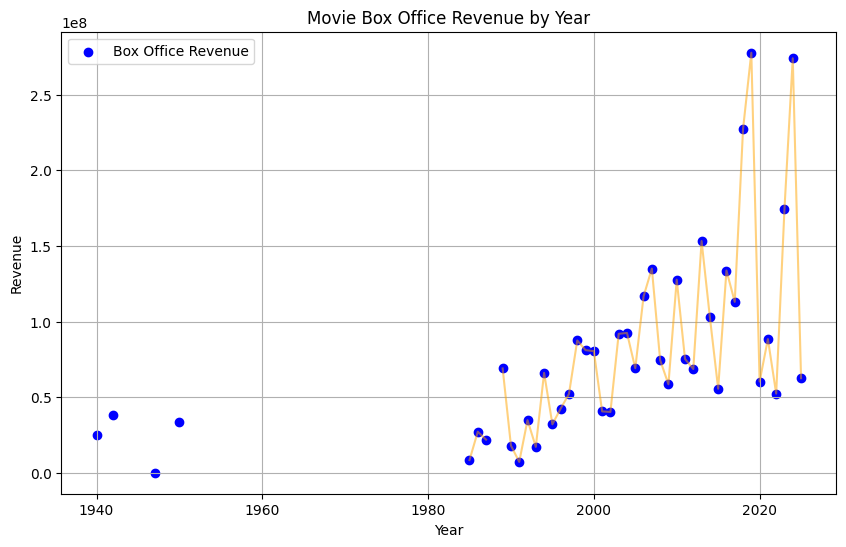

'x = Revenue_mean_year.index.astype(int).values\ny = Revenue_mean_year.values\n\nplt.figure(figsize=(10,6))\nplt.scatter(x, y, color=\'blue\', label=\'Box Office Revenue\')\nplt.plot(x, y, color=\'orange\', alpha=0.5)\nplt.xlabel("Year")\nplt.ylabel("Revenue")\nplt.title("Movie Box Office Revenue by Year")\n\nplt.xticks(range(min(x), max(x) + 1, 5))\n\n\nplt.grid(True)\nplt.legend()\nplt.show()'

In [ ]:
#plolt revinue by year
import matplotlib.pyplot as plt

# Assume your Series is called box_office
x = Revenue_mean_year.index.values    # Years
y = Revenue_mean_year.values          # Revenue

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Box Office Revenue')  # Scatter plot
plt.plot(x, y, color='orange', alpha=0.5)  # Optional line to show trend
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Movie Box Office Revenue by Year")
plt.grid(True)
plt.legend()
plt.show()




In [ ]:
#Revenue for each decade
Revenue_mean_dec = df.groupby('Decade')['Revenue'].mean()

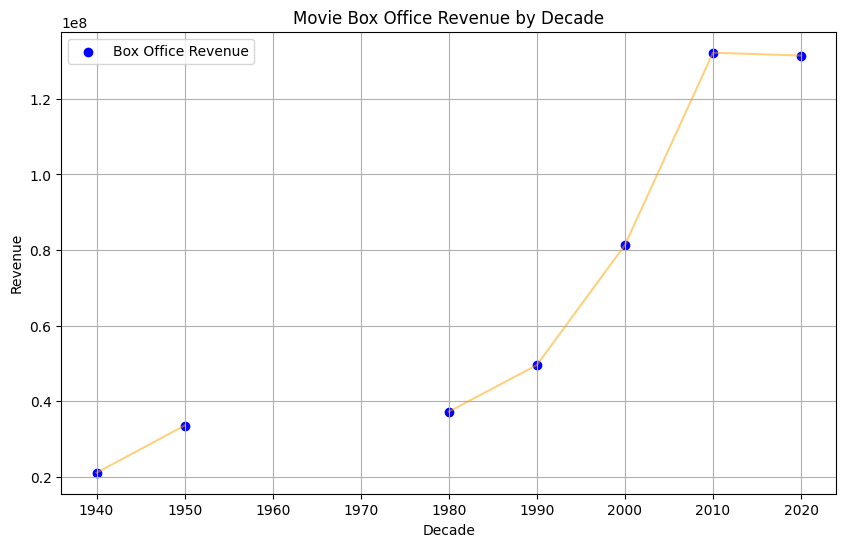

In [ ]:
x = Revenue_mean_dec.index.values    # Decades
y = Revenue_mean_dec.values          # Revenue

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Box Office Revenue')  # Scatter plot
plt.plot(x, y, color='orange', alpha=0.5)  # Optional line to show trend
plt.xlabel("Decade")
plt.ylabel("Revenue")
plt.title("Movie Box Office Revenue by Decade")
plt.grid(True)
plt.legend()
plt.show()

C:\Users\scott\AppData\Local\Temp\ipykernel_27404\4168980818.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Score Type")


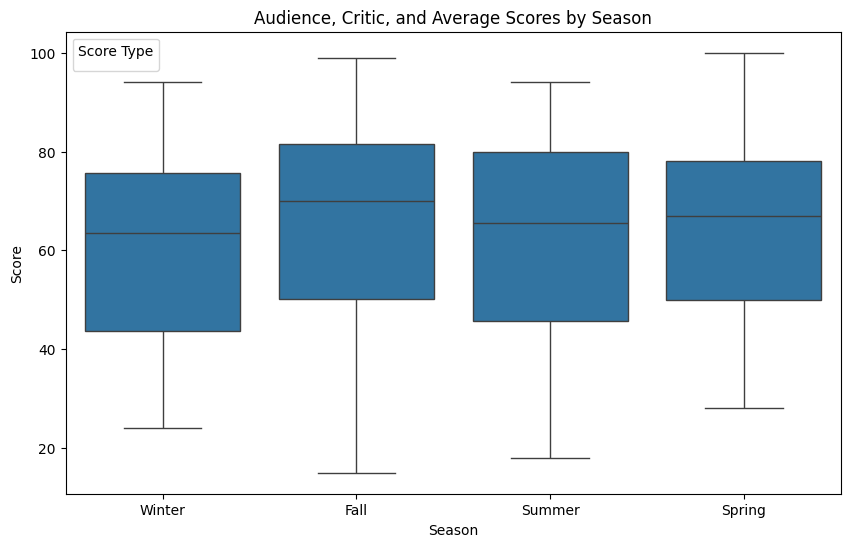

In [75]:
#Revenue for each season? 
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='Audience-Score', data=df)
plt.title("Audience, Critic, and Average Scores by Season")
plt.xlabel("Season")
plt.ylabel("Score")
plt.legend(title="Score Type")
plt.show()

<Axes: xlabel='Revenue', ylabel='Audience-Score'>

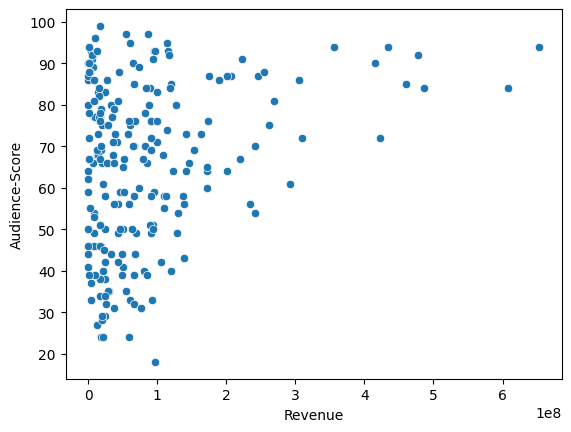

In [47]:
#Does revenue correlate with audience ratings?

sns.scatterplot(data = df, x = 'Revenue', y = 'Audience-Score')


The information depicted in the graph above is not conclusive, as it is cone-shaped.

<Axes: xlabel='Revenue', ylabel='Critic-Score'>

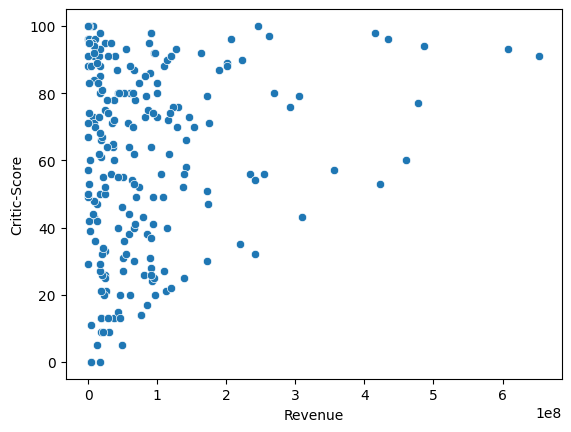

In [48]:
#Does revenue correlate with critic ratings?

sns.scatterplot(data = df, x = 'Revenue', y = 'Critic-Score')

The information depicted in the graph above is not conclusive, as it is cone-shaped. The scores of the audience and critics are similar, so little to no difference is seen.

In [ ]:
#Does revenue correlate more strongly with audience or critic ratings?

# because coralation betweent the two is so high it is unlikly to be statisticly difrent

In [ ]:
#Note: What is the trend regarding revenue?
# not clear because of conical shape, its posable there are lerking varteables like job market that year, story line/plot twists, or thers.

#Please note any other anomalies and your explanation (it's okay if you don't know)


In [90]:
#How many total directors have there been? 
df['Director'].nunique()


345

In [94]:
#How many different directors have there been each year? Each decade?
unique_directors_per_year = df.groupby('Year')['Director'].nunique()

unique_directors_per_year.head()

Year
1926.0    1
1940.0    2
1941.0    2
1942.0    1
1943.0    1
Name: Director, dtype: int64

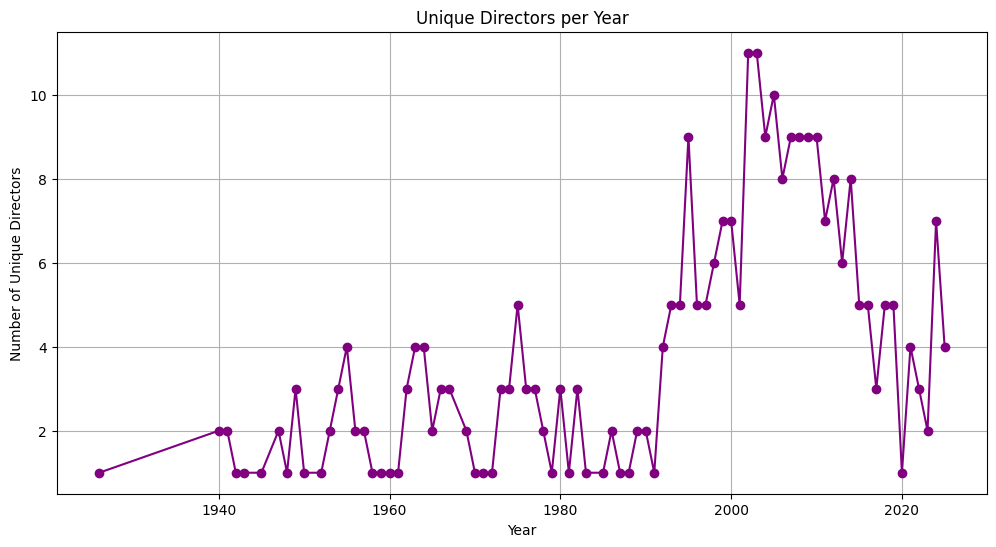

In [92]:
plt.figure(figsize=(12,6))
plt.plot(unique_directors_per_year.index, unique_directors_per_year.values, marker='o', color='purple')
plt.xlabel("Year")
plt.ylabel("Number of Unique Directors")
plt.title("Unique Directors per Year")
plt.grid(True)
plt.show()

In [98]:
#What is the average revenue of movies made by each director?

rev_dec = df.groupby('Director')['Revenue'].mean()
print(rev_dec)

Director
Aaron Blaise            85300000.0
Adam Shankman          111500000.0
Akiva Schaffer                <NA>
Alana Avallone                <NA>
Alastair Fothergill     23400000.0
                          ...     
William Dear            50200000.0
Winston Hibler                <NA>
Wolfgang Reitherman     91300000.0
Xavier Koller            3300000.0
Yu Zhong                      <NA>
Name: Revenue, Length: 345, dtype: Float64


In [ ]:
# directors sorted by highest to lowest in revenu
rev_dec.sort_values(ascending=False)

Director
Kelsey Mann             653000000.0
Chris Buck              477400000.0
David G. Derrick Jr.    460400000.0
Josh Cooley             434000000.0
Lee Unkrich             415000000.0
                           ...     
Vincent McEveety               <NA>
Will Finn                      <NA>
William Beaudine               <NA>
Winston Hibler                 <NA>
Yu Zhong                       <NA>
Name: Revenue, Length: 345, dtype: Float64

In [109]:
#What is the average rating of movies made by each director?
rev_mean_dec = df.groupby('Director')['Audience-Score'].mean()

print(rev_mean_dec.sort_values(ascending=False))

Director
Stuart Heisler      100.0
Thomas Kail          99.0
Peter Jackson        94.0
Kelsey Mann          94.0
Guy Ritchie          94.0
                    ...  
Robson Lima          <NA>
Susan Seidelman      <NA>
Ted Berman           <NA>
Toby Brusseau        <NA>
Vadim Sokolovsky     <NA>
Name: Audience-Score, Length: 345, dtype: Float64


In [106]:
#sortd mean revenu of directers
rev_mean_dec.sort_values(ascending=False)

Director
Kelsey Mann             653000000.0
Chris Buck              477400000.0
David G. Derrick Jr.    460400000.0
Josh Cooley             434000000.0
Lee Unkrich             415000000.0
                           ...     
Vincent McEveety               <NA>
Will Finn                      <NA>
William Beaudine               <NA>
Winston Hibler                 <NA>
Yu Zhong                       <NA>
Name: Revenue, Length: 345, dtype: Float64

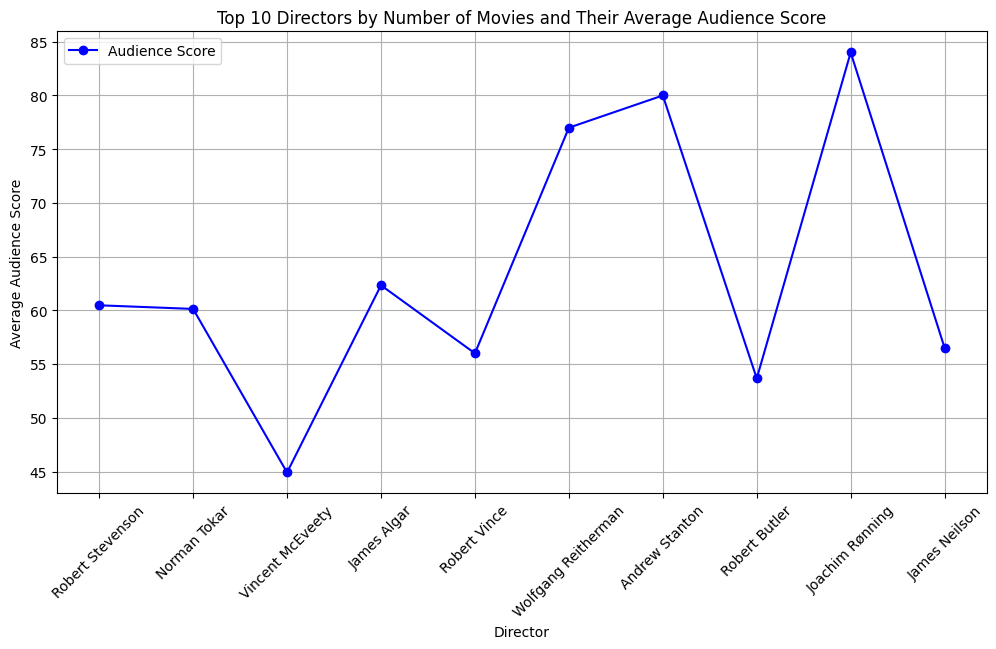

In [118]:
#Do directors with more movies have better ratings?


# Number of movies per director
director_num_movies = df.groupby('Director')['Title'].count()
director_num_movies = director_num_movies.sort_values(ascending=False)

# Average Audience Score per director
aud_mean_director = df.groupby('Director')['Audience-Score'].mean()

# Combine into DataFrame for clarity
director_ratings = pd.DataFrame({
    'Movies': director_num_movies,
    'Audience': aud_mean_director
})

# Sort by number of movies (highest first)
director_ratings = director_ratings.sort_values(by='Movies', ascending=False)

# Plot top 10 directors for clarity
top_directors = director_ratings.head(10)

plt.figure(figsize=(12,6))
plt.plot(top_directors.index, top_directors['Audience'], marker='o', color='blue', label='Audience Score')
plt.xticks(rotation=45)
plt.xlabel("Director")
plt.ylabel("Average Audience Score")
plt.title("Top 10 Directors by Number of Movies and Their Average Audience Score")
plt.legend()
plt.grid(True)
plt.show()


From this table, because the variance gets higher as the number of movies directed goes down, we can’t make an accurate conclusion. This is unsurprising because of the small n for each director (getting smaller for each one, thus variance would be expected to increase).

In [ ]:
#Do directors movies get better ratings as they make more movies?




In [ ]:
#Note: Make any notes about directors and relationships with other variables



Film-Rating
G        61.757282
PG       61.383333
PG-13         72.3
R             64.5
TV-14         89.0
TV-G          62.0
TV-PG         52.0
Name: Audience-Score, dtype: Float64


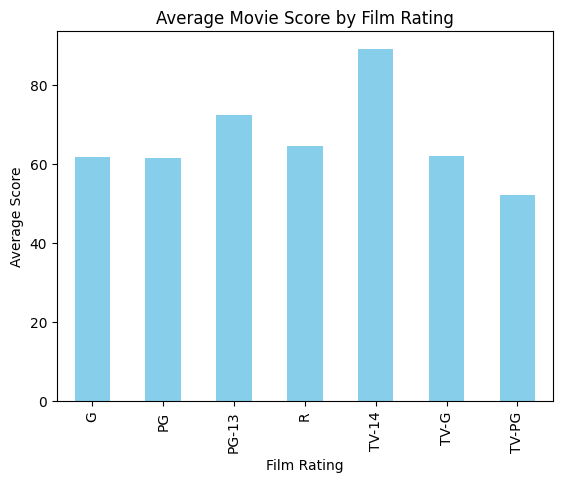

In [123]:
#Any interesting relationships between film rating and rating?

RandR = df.groupby('Film-Rating')['Audience-Score'].mean()
print(RandR)

RandR.plot(kind='bar', color='skyblue')
plt.xlabel("Film Rating")
plt.ylabel("Average Score")
plt.title("Average Movie Score by Film Rating")
plt.show()


Nothing of particular interest, but TV-14 seems to have slightly higher values and might warrant looking into.

Film-Rating
G        61.757282
PG       61.383333
PG-13         72.3
R             64.5
TV-14         89.0
TV-G          62.0
TV-PG         52.0
Name: Audience-Score, dtype: Float64


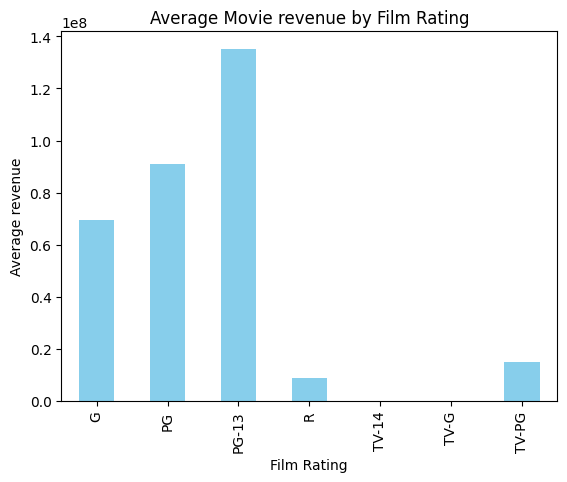

In [147]:
#What about film rating and revenue? 


rev_rate = df.groupby('Film-Rating')['Revenue'].mean()
print(RandR)

rev_rate.plot(kind='bar', color='skyblue')
plt.xlabel("Film Rating")
plt.ylabel("Average revenue")
plt.title("Average Movie revenue by Film Rating")
plt.show()

PG-13 appears to have the highest average revenue.

In [ ]:
#Note: Note anything interesting regarding film rating

#The only significant thing about ratings is that PG-13 makes the most money on average and should be looked into.

In [ ]:
#Any interesting relationships between genre and rating?


In [ ]:
#What about genre and revenue?


In [ ]:
#What is the count of different film ratings in each genre?


In [ ]:
#Note: Add anything interesting regarding genre



In [ ]:
#Note: Add any overall thoughts

